<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Integral_de_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<span style="color:blue;">**Integral de fourier**</span>
Considere la función pulso unitario:
$$
f(x) =
\begin{cases}
1, & \text{si } -1 \leq x \leq 1 \\
0, & \text{en otro caso}
\end{cases}
$$
<span style="color:magenta;">a.   Grafique la función</span>




In [82]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad
from scipy.special import sici  # Importa la función integral seno (Si)

In [83]:
x_sym, w_sym = sp.symbols('x w', real=True)

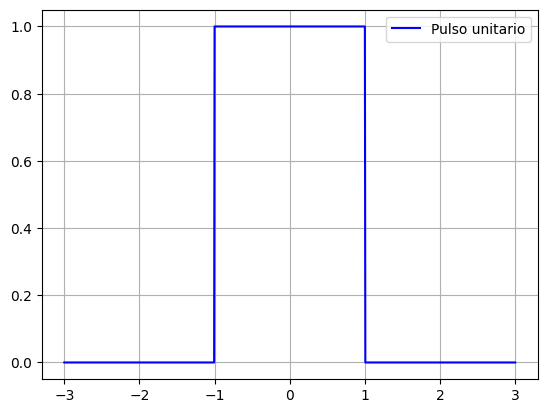

In [76]:
def f_pulso(x):
    return np.where((x >= -1) & (x <= 1), 1, 0)

x_vals = np.linspace(-3, 3, 1000)
plt.plot(x_vals, f_pulso(x_vals), 'b-', label='Pulso unitario')
plt.legend()
plt.grid()
plt.show()

<span style="color:magenta;">b.    Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.</span>


 ## Representación como integral de Fourier
 Para una función par como esta, usamos la $\textbf{integral de Fourier de coseno}$:

$$
f(x) = \int_0^{\infty} A(w) \cos(wx) \, dw,
$$

donde:

$$
A(w) = \frac{2}{\pi} \int_0^{\infty} f(x) \cos(wx) \, dx.
$$



 Calculamos A(w)

In [84]:
A_w = (2/sp.pi) * sp.integrate(sp.cos(w_sym * x_sym), (x_sym, 0, 1))
print("A(w) =", A_w)  # Debería ser (2*sin(w))/(π*w)

A(w) = 2*Piecewise((sin(w)/w, Ne(w, 0)), (1, True))/pi


Función para evaluar la integral de Fourier numéricamente

In [85]:
def f_fourier(x_val, a=100):
    integrand = lambda w: (2/np.pi) * (np.sin(w)/w) * np.cos(w * x_val)
    result, _ = quad(integrand, 0, a)
    return result

Comparación gráfica

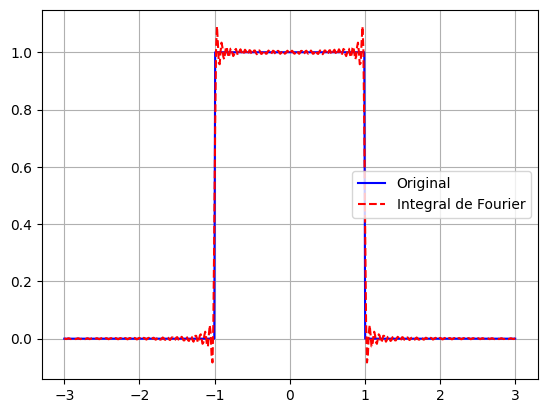

In [86]:
x_plot = np.linspace(-3, 3, 500)
y_fourier = np.array([f_fourier(x) for x in x_plot])

plt.plot(x_plot, f_pulso(x_plot), 'b-', label='Original')
plt.plot(x_plot, y_fourier, 'r--', label='Integral de Fourier')
plt.legend()
plt.grid()
plt.show()

<span style="color:magenta;">c.    Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso b. .</span>

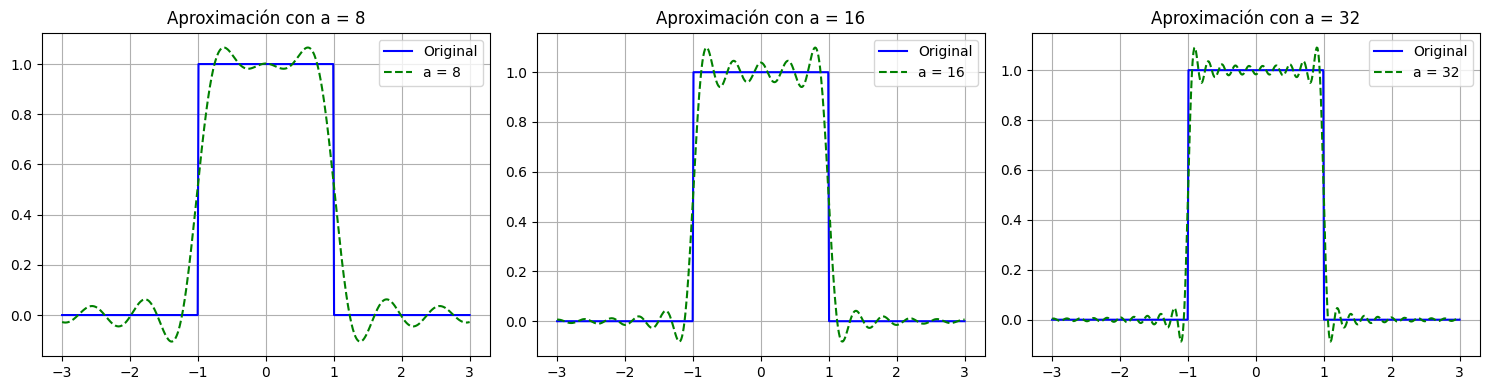

In [87]:
a_values = [8, 16, 32]
plt.figure(figsize=(15, 4))

for i, a in enumerate(a_values, 1):
    # Cálculo simbólico de la aproximación truncada
    f_approx = (2/sp.pi) * sp.integrate((sp.sin(w_sym)/w_sym) * sp.cos(w_sym * x_sym), (w_sym, 0, a))

    # Convierte a función numérica, explicitly mapping sp.Si to sici.
    f_approx_func = sp.lambdify(x_sym, f_approx, modules=['numpy', {'Si': lambda z: sici(z)[0]}])

    # Evaluación
    y_approx = f_approx_func(x_plot)

    plt.subplot(1, 3, i)
    plt.plot(x_plot, f_pulso(x_plot), 'b-', label='Original')
    plt.plot(x_plot, y_approx, 'g--', label=f'a = {a}')
    plt.title(f'Aproximación con a = {a}')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()